### Dicionário de Dados

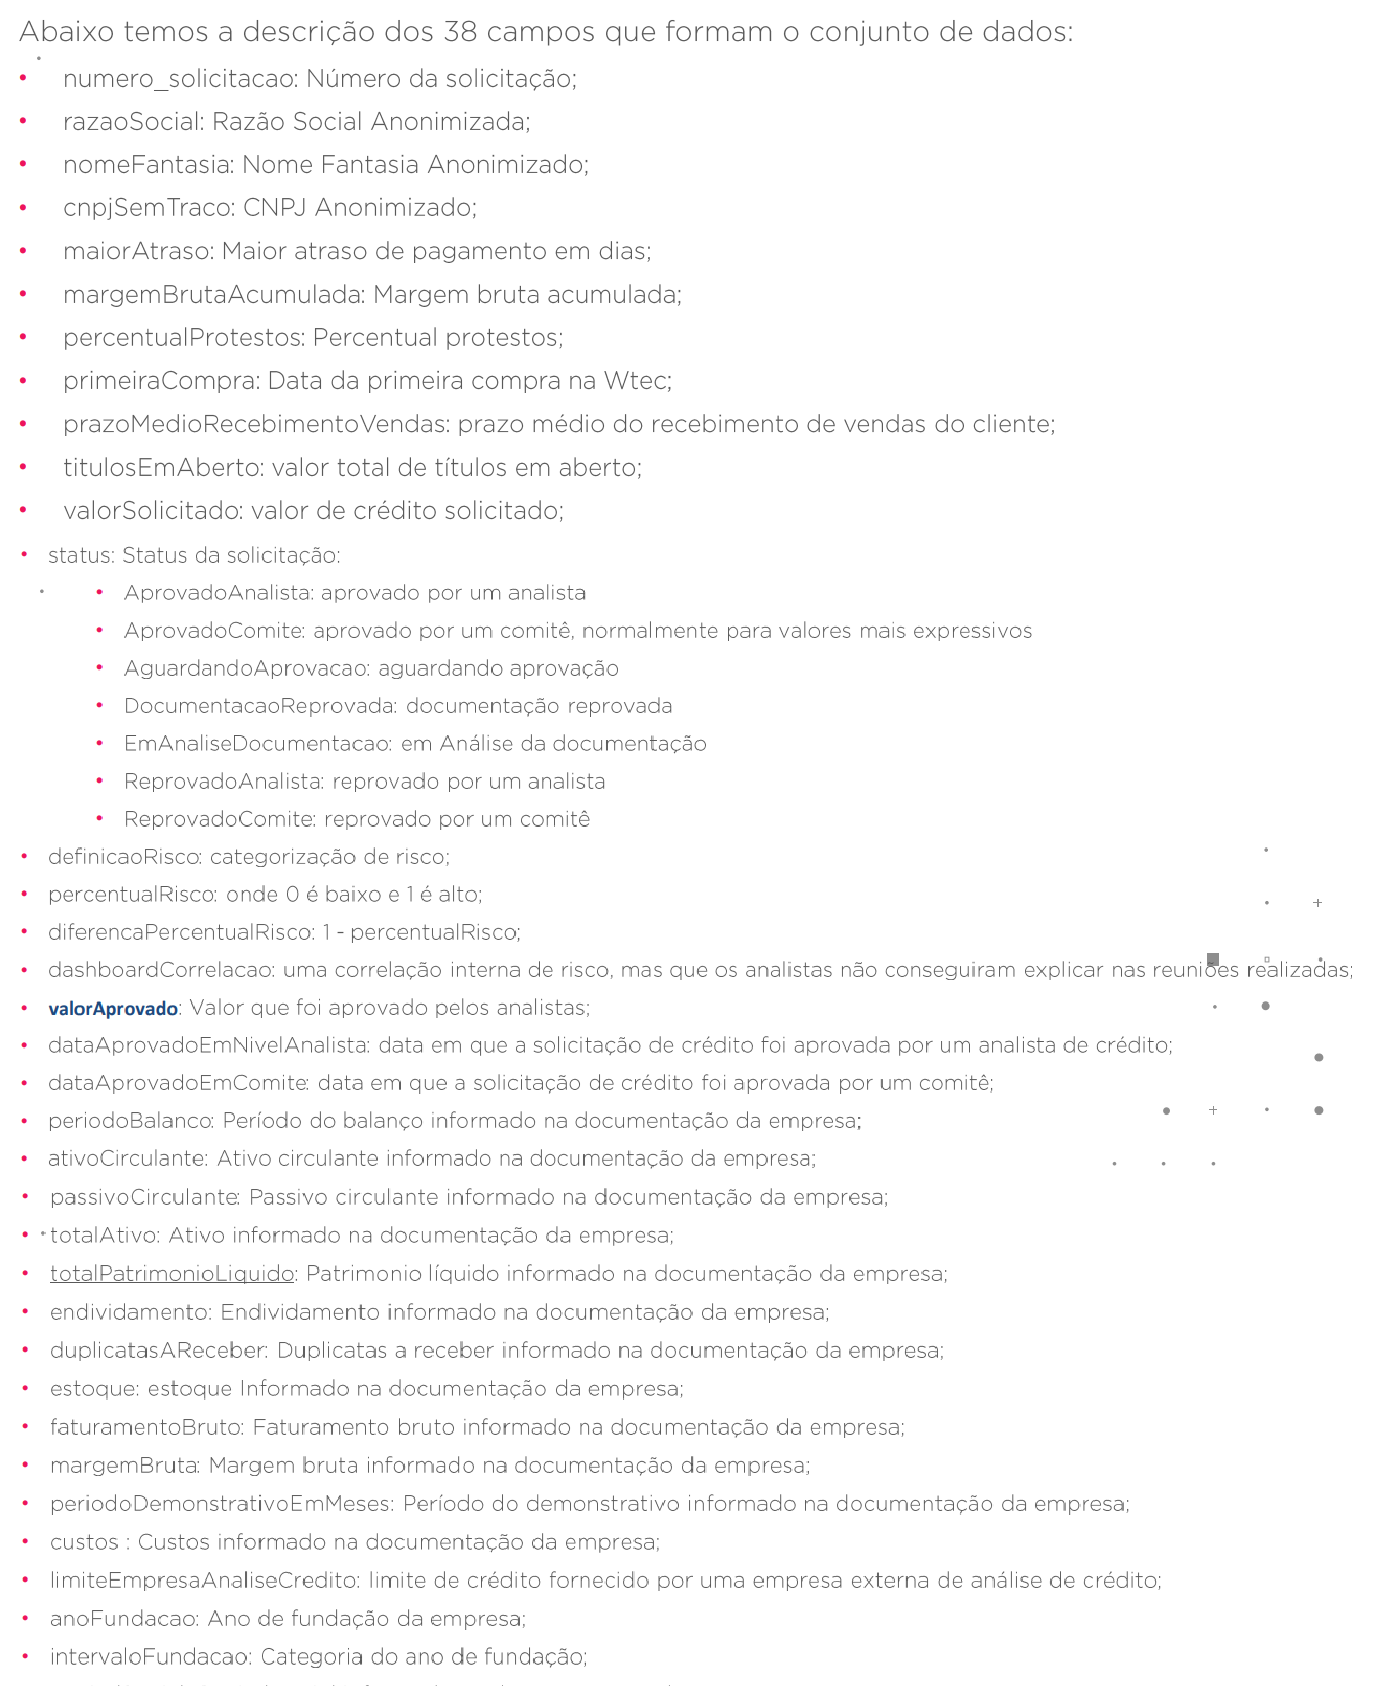

## Lógica usada neste trabalho
Existem dois problemas principais neste dataset:
    - Muitos nulos
    - Algumas variáveis não são 'inputáveis'
    - Alta correlação entre colunas
Portanto, será necessário realizar uma redução de dimensionalidade, primeiramente em colunas que sejam resultados calculados de análises feitas fora do escopo deste trabalho.

### Fluxo:
1. Redução da dimensionalidade em colunas que expressem dados de outros processos
2. Feature engineering 
3. Análise de colunas categóricas
4. Tratamento de nulos
5. Validação de feature importance
6. Redução de dimensionalidade com base na feature importance (para modelo preditivo)
7. Segmentação do dataframe
8. Análise de características dos clusters
9. Modelos preditivos por cluster


In [166]:
#carregando dicionário de dados
with open ('descricao_colunas.json', 'r') as jsonfile:
    dict_desc_colunas = json.load(jsonfile)

In [175]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import json
import warnings
warnings.filterwarnings("ignore")

In [168]:
df = pd.read_csv('bootcamp-solicitacoescredito.csv')
df.shape

(8973, 38)

In [169]:
pd.set_option('display.max_columns', df.shape[1])
df

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,0.283019,0.000000,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1766880.0,0.0,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.000000,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,10000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,0.283019,0.000000,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2814940.0,0.0,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.000000,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,25000.0,AprovadoAnalista,De 51 a 80 % - Alto,0.396226,0.603774,0.485811,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285274.0,0.0,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.000000,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.830189,0.169811,0.000000,50000.0,NaN,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,14544378.0,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.000000,89000.0,2020-02-04T15:06:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,9041,Leah Williams,Georgia Booth,YKGZ02907098931653,149,0.306580,0.0,2006-04-26T00:00:00,59,599964.04,900000.0,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990876,NaN,NaN
8969,9042,Mr. Jordan Stevens,Miss Ellie Kelly,UCBM91111020900951,23,0.329796,0.0,2016-08-03T00:00:00,0,0.00,150000.0,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958869,NaN,NaN
8970,9043,Mr. Barry Wells,Danielle Hudson,CLDB61185288622179,3,0.383919,0.0,2018-10-25T00:00:00,4,2933.38,150000.0,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
8971,9044,Keith Jones,Steven Kennedy-Jones,BRJP37453437154592,11,0.424099,0.0,2011-08-10T00:00:00,31,559679.98,1290000.0,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.994786,NaN,NaN


### reduzindo dimensionalidade de negócios
##### dados externos e cadastrais
Dropar:
* numero_solicitacao
* razaoSocial
* nomeFantasia
* maiorAtraso
* margemBrutaAcumulada
* percentualProtestos
* status
* definicaoRisco
* diferencaPercentualRisco
* percentualRisco
* dashboardCorrelacao
* dataAprovadoEmComite
* anoFundacao - existe coluna categórica intervaloFundacao que permitiria segmentacao
* restricoes
* scorePontualidade
* limiteEmpresaAnaliseCredito
* dataAprovadoNivelAnalista

In [190]:
df = pd.read_csv('bootcamp-solicitacoescredito.csv')
a_dropar = [
    'numero_solicitacao',
    'razaoSocial',
    'nomeFantasia',
    'maiorAtraso',
    'margemBrutaAcumulada',
    'percentualProtestos',
    'status',
    'definicaoRisco',
    'diferencaPercentualRisco',
    'percentualRisco',
    'dashboardCorrelacao',
    'dataAprovadoEmComite',
    'anoFundacao',
    'restricoes',
    'scorePontualidade',
    'limiteEmpresaAnaliseCredito',
    'dataAprovadoNivelAnalista',
]

for col in a_dropar:
    print (col+':', dict_desc_colunas[col])

df = df.drop(columns=a_dropar)

numero_solicitacao: Número da solicitação
razaoSocial: Razão Social Anonimizada
nomeFantasia: Nome Fantasia Anonimizado
maiorAtraso: Maior atraso de pagamento em dias
margemBrutaAcumulada: Margem bruta acumulada
percentualProtestos: Percentual protestos
status: Status da solicitação
definicaoRisco: categorização de risco
diferencaPercentualRisco: 1- percentual Risco
percentualRisco: onde O é baixo e 1 é alto
dashboardCorrelacao: uma correlação interna de risco, mas que os analistas não conseguiram explicar nas reuniões realizadas
dataAprovadoEmComite: data em que a solicitação de crédito foi aprovada por um comitê
anoFundacao: Ano de fundação da empresa
restricoes: Flag informando se existem restrições relacionadas ao cliente
scorePontualidade: score de pontualidade entre 0 e 1, onde é significa que o cliente é pontual
limiteEmpresaAnaliseCredito: limite de crédito fornecido por uma empresa externa de análise de crédito
dataAprovadoNivelAnalista: data em que a solicitação de crédito fo

In [171]:
# observando df após drop
df

,cnpjSemTraco,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,intervaloFundacao,capitalSocial,empresa_MeEppMei
0,KEBE17609492220843,2015-12-10T00:00:00,0,0.00,50000.0,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1766880.0,0.0,12.0,0.0,Acima de 17 anos,90000.0,True
1,JRBK88908250677300,2019-06-12T17:28:31,0,0.00,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GCVQ28531614261293,2019-11-27T00:00:00,0,0.00,20000.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2814940.0,0.0,7.0,0.0,De 6 a 10 anos,20000.0,True
3,KJND32266018316396,2017-02-13T17:20:27,0,0.00,25000.0,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285274.0,0.0,12.0,0.0,De 6 a 10 anos,30000.0,True
4,CGQN15826802440348,2010-07-13T00:00:00,20,1486.95,50000.0,50000.0,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,14544378.0,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,9.0,40680051.0,Acima de 17 anos,75000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,YKGZ02907098931653,2006-04-26T00:00:00,59,599964.04,900000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8969,UCBM91111020900951,2016-08-03T00:00:00,0,0.00,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8970,CLDB61185288622179,2018-10-25T00:00:00,4,2933.38,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8971,BRJP37453437154592,2011-08-10T00:00:00,31,559679.98,1290000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nulos
Verificando a possibilidade de aproveitar um dado não-nulo de uma empresa (de uma solicitação de crédito) em uma linha que tenha este mesmo dado nulo (em outra solicitação)

In [172]:
#nulos
df.isna().sum()/df.shape[0]

cnpjSemTraco                   0.000000
primeiraCompra                 0.011813
prazoMedioRecebimentoVendas    0.000000
titulosEmAberto                0.000000
valorSolicitado                0.000000
valorAprovado                  0.156469
periodoBalanco                 0.472529
ativoCirculante                0.472529
passivoCirculante              0.472529
totalAtivo                     0.472529
totalPatrimonioLiquido         0.472529
endividamento                  0.472529
duplicatasAReceber             0.472529
estoque                        0.472529
faturamentoBruto               0.083584
margemBruta                    0.083584
periodoDemonstrativoEmMeses    0.083584
custos                         0.083584
intervaloFundacao              0.083027
capitalSocial                  0.083027
empresa_MeEppMei               0.083027
dtype: float64

In [181]:
#verificando se alguns dos dados nulos estão sob o mesmo CNPJ em outras linhas
empresas = df['cnpjSemTraco'].unique()
print (str(len(empresas))+' empresas no dataset')
indice_sem_balanco = df.loc[(df['totalAtivo'].isnull())].index
contagem_por_empresa = df['cnpjSemTraco'].value_counts()
nulos_por_empresa_campo = df[['cnpjSemTraco','totalAtivo']]
nulos_por_empresa_campo['null'] = ~nulos_por_empresa_campo['totalAtivo']\
                                            .notnull()\
                                            .astype(bool)
nulos_por_empresa_campo = nulos_por_empresa_campo.drop(columns = ['totalAtivo'])


nulos_por_empresa = nulos_por_empresa_campo.groupby(by='cnpjSemTraco').sum()
nulos_por_empresa['contagem_por_empresa'] = contagem_por_empresa
nulos_por_empresa['pct_nulos_totalAtivo'] = nulos_por_empresa['null'] / \
                                        nulos_por_empresa['contagem_por_empresa']
nulos_por_empresa[(nulos_por_empresa['pct_nulos_totalAtivo']>0) & (nulos_por_empresa['pct_nulos_totalAtivo']<1)]\
                    .sort_values('pct_nulos_totalAtivo', ascending = False)

2829 empresas no dataset


,null,contagem_por_empresa,pct_nulos_totalAtivo
cnpjSemTraco,,,
LPFJ21465680706778,10,11,0.909091
CKWJ48521633259803,9,10,0.900000
FOZQ39728582407424,8,9,0.888889
CXIG28465604067668,7,8,0.875000
DCYQ25190726049709,7,8,0.875000
...,...,...,...
PWKB17417173046971,1,13,0.076923
ARLG39955776479526,1,14,0.071429
DSDP42915296213541,1,16,0.062500


In [183]:
df[df['cnpjSemTraco']=='PWKB17417173046971']

,cnpjSemTraco,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,intervaloFundacao,capitalSocial,empresa_MeEppMei
1410,PWKB17417173046971,2006-04-26T09:51:14,0,0.0,6000000.0,3500000.0,2019-12-31T03:00:00,92365006.0,66335561.0,132949875.0,66716091.0,1142148.0,31510896.0,34295958.0,239016696.0,82622573.0,12.0,156394122.0,Acima de 17 anos,30515674.0,False
1441,PWKB17417173046971,2006-04-26T09:51:14,0,0.0,6000000.0,6000000.0,2019-12-31T03:00:00,92365006.0,66335561.0,132949875.0,66716091.0,1142148.0,31510896.0,34295958.0,239016696.0,82622573.0,12.0,156394122.0,Acima de 17 anos,30515674.0,False
2002,PWKB17417173046971,2006-04-26T09:51:14,0,0.0,3000000.0,3000000.0,2018-12-31T02:00:00,78618000.0,38394000.0,87241000.0,42570000.0,3175000.0,29875000.0,28152000.0,203852000.0,71000000.0,12.0,132852000.0,Acima de 17 anos,30515674.0,False
3713,PWKB17417173046971,2006-04-26T09:51:14,0,0.0,3120000.0,3000000.0,2020-06-30T03:00:00,307905559.0,86673742.0,447268159.0,331010581.0,10925014.0,43565112.0,45990651.0,116888249.0,31102688.0,6.0,85785561.0,Acima de 17 anos,30515674.0,False
4209,PWKB17417173046971,2006-04-26T09:51:14,0,0.0,3500000.0,3350000.0,2020-06-30T03:00:00,307905559.0,86673742.0,447268159.0,331010581.0,10925014.0,43565112.0,45990651.0,116888249.0,31102688.0,6.0,85785561.0,Acima de 17 anos,30515674.0,False
4651,PWKB17417173046971,2006-04-26T09:51:14,0,0.0,3215000.0,3215000.0,2020-06-30T03:00:00,307905559.0,86673742.0,447268159.0,331010581.0,10925014.0,43565112.0,45990651.0,116888249.0,31102688.0,6.0,85785561.0,Acima de 17 anos,30515674.0,False
5006,PWKB17417173046971,2006-04-26T09:51:14,0,0.0,5000000.0,4000000.0,2020-06-30T06:00:00,307905559.0,97681665.0,447268159.0,331010581.0,10925014.0,43565112.0,45990651.0,149238970.0,63453409.0,6.0,85785561.0,Acima de 17 anos,30515674.0,False
5492,PWKB17417173046971,2006-04-26T09:51:14,0,0.0,5000000.0,4150000.0,2020-06-30T06:00:00,307905559.0,97681665.0,447268159.0,331010581.0,10925014.0,43565112.0,45990651.0,149238970.0,63453409.0,6.0,85785561.0,Acima de 17 anos,30515674.0,False
5499,PWKB17417173046971,2006-04-26T09:51:14,0,0.0,5000000.0,5000000.0,2020-06-30T09:00:00,307905559.0,97681665.0,458268159.0,331010581.0,10925014.0,43565112.0,45990651.0,149238970.0,63453409.0,6.0,85785561.0,Acima de 17 anos,30515674.0,False
7179,PWKB17417173046971,2006-04-26T09:51:14,0,0.0,2900000.0,2900000.0,2020-06-30T09:00:00,307905559.0,97681665.0,458268159.0,331010581.0,10925014.0,43565112.0,45990651.0,149238970.0,63453409.0,6.0,85785561.0,Acima de 17 anos,352267734.0,False


In [177]:
empresa_exemplo = df[df['cnpjSemTraco']=='PWKB17417173046971'].T
empresa_exemplo.iloc[18]

1410    Acima de 17 anos
1441    Acima de 17 anos
2002    Acima de 17 anos
3713    Acima de 17 anos
4209    Acima de 17 anos
4651    Acima de 17 anos
5006    Acima de 17 anos
5492    Acima de 17 anos
5499    Acima de 17 anos
7179    Acima de 17 anos
7220    Acima de 17 anos
8702                 NaN
8706    Acima de 17 anos
Name: intervaloFundacao, dtype: object

Reordenando dataframe por empresa e data e tratando na com backfill

In [226]:
#reordenando dataframe
df = df.sort_values(['cnpjSemTraco', 'periodoBalanco']).reset_index(drop=True)
#quebrando dataframe em dicionarios
dict_empresas = {}
for empresa in empresas:
    dict_empresas.update({empresa:df[df['cnpjSemTraco']==empresa]})
#realizando o fillna por empresa usando ffill
for empresa in dict_empresas:
    dict_empresas[empresa] = dict_empresas[empresa].fillna(method='ffill')
#reconstruindo dataframe
lista_df = []
for empresa in dict_empresas:
    dict_empresas[empresa] = dict_empresas[empresa].fillna(method='ffill')
    lista_df.append(dict_empresas[empresa])
df2 = pd.concat(lista_df)
df2.shape

(8973, 21)

In [225]:
# observando nulos
(df2.isna().sum()/df.shape[0]).sort_values(ascending = False)

primeiraCompra                 1.000000
totalPatrimonioLiquido         0.307924
periodoBalanco                 0.307924
ativoCirculante                0.307924
passivoCirculante              0.307924
totalAtivo                     0.307924
endividamento                  0.307924
duplicatasAReceber             0.307924
estoque                        0.307924
valorAprovado                  0.053605
margemBruta                    0.010476
capitalSocial                  0.010476
intervaloFundacao              0.010476
custos                         0.010476
periodoDemonstrativoEmMeses    0.010476
empresa_MeEppMei               0.010476
faturamentoBruto               0.010476
valorSolicitado                0.000000
titulosEmAberto                0.000000
prazoMedioRecebimentoVendas    0.000000
cnpjSemTraco                   0.000000
dtype: float64

In [6]:
#substituindo nulos da variável resposta
df['valorAprovado'] = df['valorAprovado'].fillna(0)

Analisando únicos

In [18]:
# Verificando a quantidade de valores únicos
nunique = df.nunique()
nunique[nunique<10]

status               7
definicaoRisco       4
intervaloFundacao    4
restricoes           2
empresa_MeEppMei     2
dtype: int64

Vemos então que possivelmente as colunas
* status
* definicaoRisco
* intervaloFundacao
* restricoes
* empresa_MeEppMei

são provavelmente categóricas.

In [30]:
for col in nunique[nunique<10].index:
    print (col,df[col].unique(),'\n\n')

status ['AprovadoAnalista' 'DocumentacaoReprovada' 'AprovadoComite'
 'ReprovadoAnalista' 'ReprovadoComite' 'EmAnaliseDocumentacao'
 'AguardandoAprovacao'] 


definicaoRisco ['De 11 a 30 % - Baixo' 'De 0 a 10 % - Muito Baixo' 'De 51 a 80 % - Alto'
 'De 31 a 50 % - Médio'] 


intervaloFundacao ['Acima de 17 anos' nan 'De 6 a 10 anos' 'De 11 a 16 anos' 'De 0 a 5 anos'] 


restricoes [False nan True] 


empresa_MeEppMei [True nan False] 




Label Encode variáveis object:

In [7]:
def label_encode_df(df):
    le = LabelEncoder()
    df_le = df.copy()
    for col in df_le:
        if df_le.dtypes[col] == 'O':
            df_le[col] = le.fit_transform(df_le[col])
    return df_le
            
df_le = label_encode_df(df)
display(df_le)

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,1117,69,1148,0,0.252448,0.0,738,0,0.00,50000.0,1,1,0.716981,0.283019,0.000000,50000.0,558,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1766880.0,0.0,12.0,0.0,2003.0,0,90000.0,0,1,1.000000,43200.0,0
1,2,624,1839,1101,0,0.000000,NaN,1511,0,0.00,10000.0,3,0,1.000000,0.000000,0.000000,0.0,558,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2,2,0.000000,NaN,7011
2,3,1228,606,669,4,0.624777,0.0,1647,0,0.00,20000.0,1,1,0.716981,0.283019,0.000000,20000.0,558,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2814940.0,0.0,7.0,0.0,2014.0,3,20000.0,0,1,1.000000,4320.0,4
3,4,981,2461,1178,20,0.000000,NaN,956,0,0.00,25000.0,1,3,0.396226,0.603774,0.485811,15000.0,558,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285274.0,0.0,12.0,0.0,2013.0,3,30000.0,0,1,0.000000,5920.0,3
4,5,2279,800,249,20,0.454088,0.0,263,20,1486.95,50000.0,1,1,0.830189,0.169811,0.000000,50000.0,558,51,14758917.0,12149031.0,25793410.0,14544378.0,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,9.0,40680051.0,2002.0,0,75000.0,0,0,1.000000,89000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,9041,1457,945,2654,149,0.306580,0.0,24,59,599964.04,900000.0,4,0,1.000000,0.000000,0.000000,0.0,558,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2,2,0.990876,NaN,7011
8969,9042,1909,1707,2172,23,0.329796,0.0,848,0,0.00,150000.0,4,0,1.000000,0.000000,0.000000,0.0,558,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2,2,0.958869,NaN,7011
8970,9043,1816,420,267,3,0.383919,0.0,1364,4,2933.38,150000.0,4,0,1.000000,0.000000,0.000000,0.0,558,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2,2,1.000000,NaN,7011
8971,9044,1380,2536,183,11,0.424099,0.0,316,31,559679.98,1290000.0,4,0,1.000000,0.000000,0.000000,0.0,558,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2,2,0.994786,NaN,7011


<AxesSubplot:>

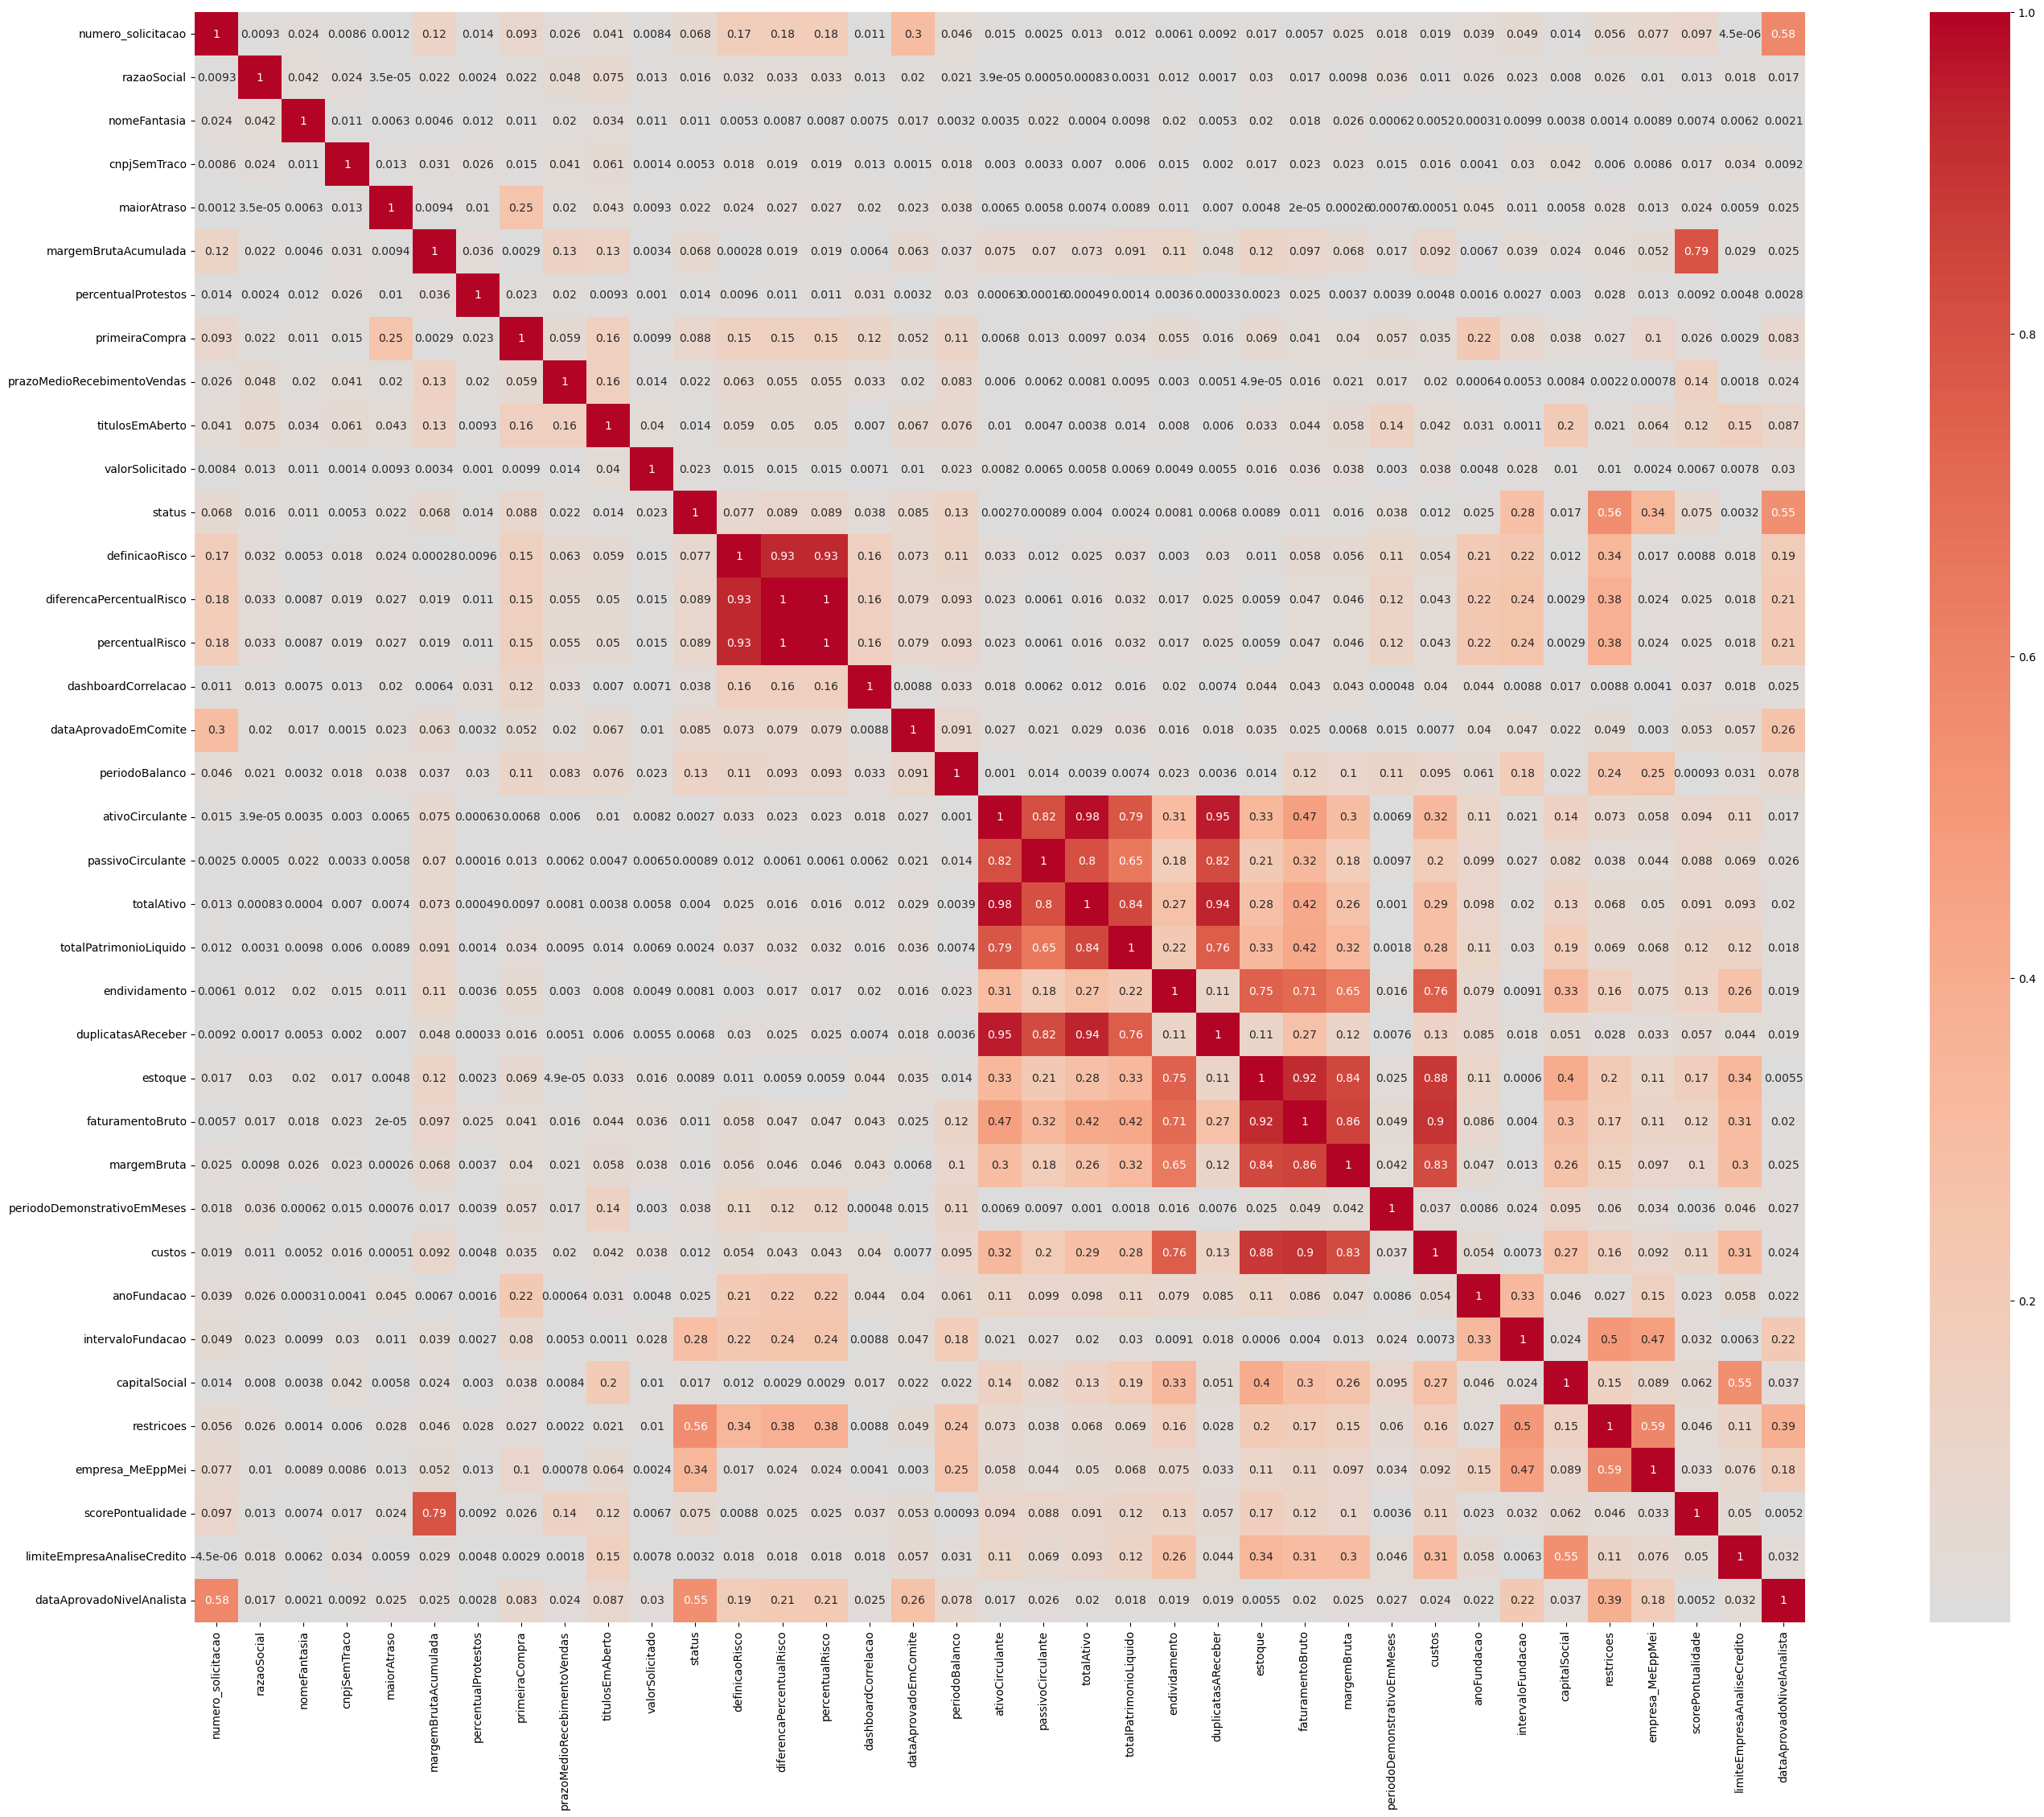

In [15]:
plt.figure(figsize=(40, 26))
x_corr = df_le.copy().drop(columns=['valorAprovado']).corr()
x_corr = (x_corr**2)**0.5 # fazendo correlações negativas se tornarem positivas
sns.heatmap(x_corr, annot=True, cmap='coolwarm', center=0, square=True)

Notamos acima que existem colunas com alta correlação. Vamos obte-las.

In [9]:
def obtem_alta_correlacao(df,col, dict_corr = {}, threshold = 0.7):
    for c in df.columns:
        if df.dtypes[c] == 'O':
            raise Exception ('DF deve ter passado por Label Encoding antes!')
    for col_other in df.columns:
        if col_other != col:
            select = [col, col_other]
            corr = ((df[col].corr(df[col_other]))**2**0.5)
            if corr  > threshold:
                try:
                    dict_corr[col].update({col_other:corr})
                except:
                    dict_corr.update({col:{col_other:corr}})
    return dict_corr

dict_corr = {}
for col in df_le:
    obtem_alta_correlacao(df_le, col, dict_corr = dict_corr)

for col in dict_corr:
    print (col)
    print ('\t',dict_corr[col])

C:\Users\diego.cohen\AppData\Local\Temp\ipykernel_9644\971389864.py:8: RuntimeWarning: invalid value encountered in double_scalars
  corr = ((df[col].corr(df[col_other]))**2**0.5)


margemBrutaAcumulada
	 {'scorePontualidade': 0.7196176555822809}
definicaoRisco
	 {'percentualRisco': 0.9062474625106022}
percentualRisco
	 {'definicaoRisco': 0.9062474625106021}
ativoCirculante
	 {'passivoCirculante': 0.7525771709727241, 'totalAtivo': 0.9744494806131472, 'totalPatrimonioLiquido': 0.7115790067919773, 'duplicatasAReceber': 0.9363865943783883}
passivoCirculante
	 {'ativoCirculante': 0.7525771709727239, 'totalAtivo': 0.7357703323467979, 'duplicatasAReceber': 0.7601409864325586}
totalAtivo
	 {'ativoCirculante': 0.9744494806131472, 'passivoCirculante': 0.7357703323467981, 'totalPatrimonioLiquido': 0.7807841072678278, 'duplicatasAReceber': 0.9203038702370708}
totalPatrimonioLiquido
	 {'ativoCirculante': 0.7115790067919772, 'totalAtivo': 0.7807841072678278}
duplicatasAReceber
	 {'ativoCirculante': 0.9363865943783884, 'passivoCirculante': 0.7601409864325586, 'totalAtivo': 0.9203038702370708}
estoque
	 {'faturamentoBruto': 0.8915815138553408, 'margemBruta': 0.7856414140203015, 

Acima, temos que as colunas de alta correlação são:
* margemBrutaAcumulada
* definicaoRisco
* percentualRisco
* ativoCirculante
* passivoCirculante
* totalAtivo
* totalPatrimonioLiquido
* duplicatasAReceber
* estoque
* faturamentoBruto
* margemBruta
* custos
* scorePontualidade


Por conta disso, é útil dropar algumas dessas colunas.

Vamos agora rodar um random forest para verificar feature importance, de forma a escolher colunas para dropar.

Mas antes vamos normalizar todas as colunas.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [11]:
def standard_scale_write_picke(df, drop_na = False, write_pickle = False, filename = None):
    # transformando o dataframe com standard scaler escrevendo pickle
    if drop_na:
        df = df.dropna()
    
    X = df.drop(columns = 'valorAprovado')
    y = df['valorAprovado']

    sc = StandardScaler()
    sc.fit(X)
    
    if write_pickle:
        if filename != None:
            with open ('Models/standard_scaler_{name}.pkl'.format(filename=filename)
                       ,'wb') as picklefile:
                pickle.dump(sc, picklefile)
    
    X_z = pd.DataFrame(sc.transform(X))
    X_z.columns = X.columns
    
    return X_z, y

df_le_z, y = standard_scale_write_picke(df_le, drop_na=True)

In [12]:
#rodando feature importance em dataframe que teve todos os nan's dropados 
#trazendo colunas com correlação alta
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(df_le_z, y)
df_fi = pd.DataFrame([df_le_z.columns, rf.feature_importances_]).T
df_fi.columns = ['col', 'feature_importance']
in_corr = []
dic_dados = []
for col in df_le_z.columns:
    dic_dados.append(dict_desc_colunas[col])
    if col in dict_corr:
        in_corr.append(True)
    else:
        in_corr.append(False)
df_fi['alta_correlacao'] = in_corr
df_fi['documentacao'] = dic_dados

In [13]:
a_dropar = [
    'percentualProtestos',
    'restricoes',
    'status',
    'definicaoRisco',
    'intervaloFundacao',
    ''
]

In [14]:
df_fi.sort_values('feature_importance', ascending = True)

,col,feature_importance,alta_correlacao,documentacao
6,percentualProtestos,0.0,False,Percentual protestos
32,restricoes,0.00012,False,Flag informando se existem restrições relacion...
12,definicaoRisco,0.000131,True,categorização de risco
33,empresa_MeEppMei,0.000153,False,Flag informando se o cliente é um pequeno negócio
30,intervaloFundacao,0.000267,False,Categoria do ano de fundação
27,periodoDemonstrativoEmMeses,0.000608,False,Período do demonstrativo informado na document...
34,scorePontualidade,0.00078,True,"score de pontualidade entre 0 e 1, onde é sign..."
14,percentualRisco,0.000863,True,onde O é baixo e 1 é alto
2,nomeFantasia,0.000946,False,Nome Fantasia Anonimizado
13,diferencaPercentualRisco,0.000956,False,1- percentual Risco
